In [210]:
studentName1 = "Almira Zahra Aurelia (00000080298)"
studentName2 = "Darren Irawan Djong (00000081041)"
studentName3 = "Deby Fitria (00000081068)"
studentName4 = "Sabrina Fajrul Ula Usman (00000083124)"
studentClass = "IS388-GL"

In [211]:
print("Group Member:")
print("1. {}".format(studentName1))
print("2. {}".format(studentName2))
print("3. {}".format(studentName3))
print("4. {}".format(studentName4))

print("\nClass: \t\t{}".format(studentClass))

Group Member:
1. Almira Zahra Aurelia (00000080298)
2. Darren Irawan Djong (00000081041)
3. Deby Fitria (00000081068)
4. Sabrina Fajrul Ula Usman (00000083124)

Class: 		IS388-GL


## <div align="center"> FINAL PROJECT - GROUP </div>

# IMPORT LIBRARY

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# DATASET

https://www.kaggle.com/datasets/pavansai25/car-price-prediction

In [2]:
df = pd.read_csv("Cars.csv", delimiter=",")
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,Honda Civic,Pune,2011.0,47000.0,Petrol,Automatic,Second,13.9 kmpl,1799 CC,130.3 bhp,Others,5.0,4.0,NaN,4.50
5957,Hyundai i20,Delhi,2013.0,63777.0,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,Black/Silver,5.0,4.0,NaN,3.67
5958,Maruti Swift,Coimbatore,2016.0,37806.0,Petrol,Manual,First,20.4 kmpl,1197 CC,81.80 bhp,Black/Silver,5.0,4.0,NaN,5.20
5959,Mercedes-Benz SLK-Class,Coimbatore,2016.0,22732.0,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,Black/Silver,2.0,2.0,NaN,55.54


In [3]:
df.shape

(5961, 15)

In [4]:
# summarize the data
df.describe()

,Year,Kilometers_Driven,Seats,No. of Doors,Price
count,5959.000000,5.953000e+03,5956.000000,5960.000000,5961.000000
mean,2013.389159,5.871110e+04,5.269140,4.114933,9.528103
std,3.243051,9.171221e+04,0.789048,0.344757,11.214382
min,1998.000000,1.710000e+02,2.000000,2.000000,0.440000
25%,2011.500000,3.393100e+04,5.000000,4.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,4.000000,5.660000
75%,2016.000000,7.300000e+04,5.000000,4.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,5.000000,160.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


# DATA PREPROCESSING

**HANDLING MISSING VALUES**

In [6]:
df.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

In [7]:
df = df.dropna(subset=['Location', 'Year', 'Kilometers_Driven', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
                    'Colour', 'Seats', 'No. of Doors', 'Price'])

**FORMATTING**

In [8]:
df['Year'] = df['Year'].fillna(df['Year'].median()).astype('int')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8816\2442281602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].fillna(df['Year'].median()).astype('int')


In [9]:
df['Mileage'] = df['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8816\3944461531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)


In [10]:
df['Engine'] = df['Engine'].str.replace(' CC', '').astype(float)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8816\505899246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine'] = df['Engine'].str.replace(' CC', '').astype(float)


In [11]:
df['Power'] = df['Power'].str.replace(' bhp', '')

df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8816\1760208137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power'] = df['Power'].str.replace(' bhp', '')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8816\1760208137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power'] = pd.to_numeric(df['Power'], errors='coerce')


In [12]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,NaN,6.40


**BINNING**

In [13]:
from datetime import datetime

# fungsi perhitungan umur
def hitung_umur(tahun):
    tahun_ini = datetime.now().year
    umur = tahun_ini - int(tahun)
    return umur

# Menambahkan kolom umur ke DataFrame
df['Age'] = df['Year'].apply(hitung_umur)

# Menampilkan DataFrame dengan kolom umur
df[['Name','Year', 'Age']]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8816\1458631498.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Year'].apply(hitung_umur)


,Name,Year,Age
0,Mahindra Scorpio,2012,12
1,Maruti Baleno,2018,6
2,Mahindra Xylo,2013,11
3,Hyundai Grand,2014,10
4,Toyota Innova,2011,13
...,...,...,...
5956,Honda Civic,2011,13
5957,Hyundai i20,2013,11
5958,Maruti Swift,2016,8
5959,Mercedes-Benz SLK-Class,2016,8


In [14]:
bin = np.linspace(min(df['Year']), max(df['Year']), 4)
print(bin)

[1998. 2005. 2012. 2019.]


In [15]:
df['Year Quarter'] = pd.cut(df['Year'], bins=bin, labels=['Quarter 1', 'Quarter 2', 'Quarter 3'])
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8816\100118203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year Quarter'] = pd.cut(df['Year'], bins=bin, labels=['Quarter 1', 'Quarter 2', 'Quarter 3'])


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age,Year Quarter
0,Mahindra Scorpio,Pune,2012,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.00,12,Quarter 2
1,Maruti Baleno,Kochi,2018,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32,6,Quarter 3
2,Mahindra Xylo,Bangalore,2013,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,NaN,4.00,11,Quarter 3
3,Hyundai Grand,Delhi,2014,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,NaN,3.49,10,Quarter 3
4,Toyota Innova,Delhi,2011,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,NaN,6.40,13,Quarter 2


**NORMALIZATION**

In [16]:
scaler = MinMaxScaler()

In [17]:
df_normalize = df[['Age','Kilometers_Driven','Mileage','Engine','Power','Seats','No. of Doors','Price']]

In [18]:
df_normalize.head()

,Age,Kilometers_Driven,Mileage,Engine,Power,Seats,No. of Doors,Price
0,12,99000.0,12.05,2179.0,120.0,8.0,5.0,6.00
1,6,18678.0,21.10,998.0,100.0,5.0,4.0,8.32
2,11,197000.0,11.68,2498.0,112.0,7.0,5.0,4.00
3,10,45000.0,24.00,1120.0,70.0,5.0,4.0,3.49
4,13,65000.0,12.80,2494.0,102.0,8.0,5.0,6.40


In [19]:
df_normalize = pd.DataFrame(scaler.fit_transform(df_normalize), columns=df_normalize.columns)

In [20]:
df_normalize.head()

,Age,Kilometers_Driven,Mileage,Engine,Power,Seats,No. of Doors,Price
0,0.333333,0.015205,0.359273,0.289356,0.163180,0.750,1.000000,0.034846
1,0.047619,0.002847,0.629100,0.069594,0.125143,0.375,0.666667,0.049386
2,0.285714,0.030282,0.348241,0.348716,0.147965,0.625,1.000000,0.022311
3,0.238095,0.006897,0.715564,0.092296,0.068087,0.375,0.666667,0.019115
4,0.380952,0.009974,0.381634,0.347972,0.128946,0.750,1.000000,0.037353


**HANDLING OUTLIERS**

<Axes: >

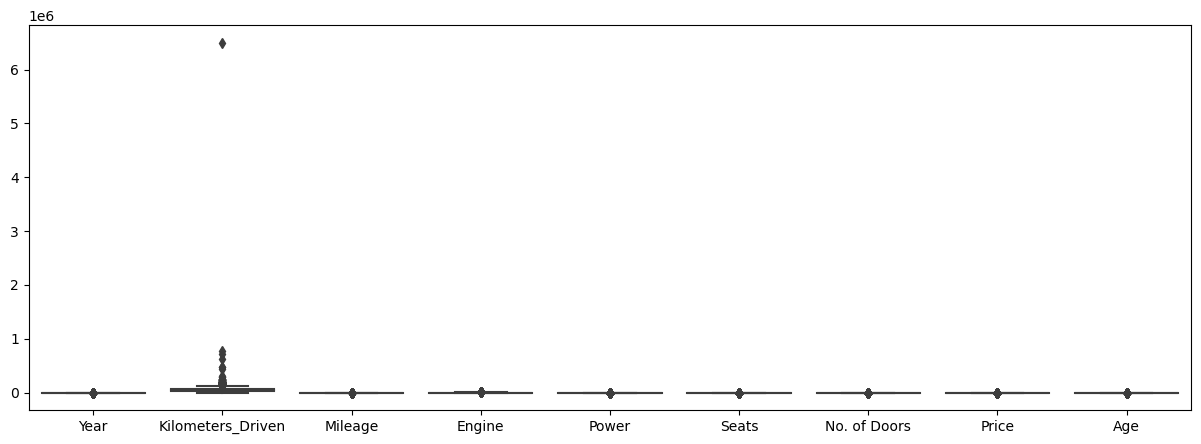

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df)

In [22]:
df_outlier = df.select_dtypes(include=['float64','int'])
df_outlier

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,No. of Doors,Price,Age
0,2012,99000.0,12.05,2179.0,120.0,8.0,5.0,6.00,12
1,2018,18678.0,21.10,998.0,100.0,5.0,4.0,8.32,6
2,2013,197000.0,11.68,2498.0,112.0,7.0,5.0,4.00,11
3,2014,45000.0,24.00,1120.0,70.0,5.0,4.0,3.49,10
4,2011,65000.0,12.80,2494.0,102.0,8.0,5.0,6.40,13
...,...,...,...,...,...,...,...,...,...
5956,2011,47000.0,13.90,1799.0,130.3,5.0,4.0,4.50,13
5957,2013,63777.0,18.50,1197.0,82.9,5.0,4.0,3.67,11
5958,2016,37806.0,20.40,1197.0,81.8,5.0,4.0,5.20,8
5959,2016,22732.0,18.10,3498.0,306.0,2.0,2.0,55.54,8


In [23]:
Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)

Q1, Q3

(Year                  2012.000
 Kilometers_Driven    33855.000
 Mileage                 15.200
 Engine                1198.000
 Power                   75.235
 Seats                    5.000
 No. of Doors             4.000
 Price                    3.500
 Age                      8.000
 Name: 0.25, dtype: float64,
 Year                  2016.0
 Kilometers_Driven    73000.0
 Mileage                 21.1
 Engine                1984.0
 Power                  138.1
 Seats                    5.0
 No. of Doors             4.0
 Price                   10.0
 Age                     12.0
 Name: 0.75, dtype: float64)

In [24]:
IQR = Q3 - Q1
IQR

Year                     4.000
Kilometers_Driven    39145.000
Mileage                  5.900
Engine                 786.000
Power                   62.865
Seats                    0.000
No. of Doors             0.000
Price                    6.500
Age                      4.000
dtype: float64

In [25]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(Year                  2006.0000
 Kilometers_Driven   -24862.5000
 Mileage                  6.3500
 Engine                  19.0000
 Power                  -19.0625
 Seats                    5.0000
 No. of Doors             4.0000
 Price                   -6.2500
 Age                      2.0000
 dtype: float64,
 Year                   2022.0000
 Kilometers_Driven    131717.5000
 Mileage                  29.9500
 Engine                 3163.0000
 Power                   232.3975
 Seats                     5.0000
 No. of Doors              4.0000
 Price                    19.7500
 Age                      18.0000
 dtype: float64)

In [26]:
outliers = ((df_outlier < lower_limit) | (df_outlier > upper_limit))
outliers

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,No. of Doors,Price,Age
0,False,False,False,False,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...
5956,False,False,False,False,False,False,False,False,False
5957,False,False,False,False,False,False,False,False,False
5958,False,False,False,False,False,False,False,False,False
5959,False,False,False,True,True,True,True,True,False


'True' indicates that a value is considered an outlier

In [27]:
# Hitung jumlah nilai True pada dataframe outliers
outliers[outliers == True].count().sum()

3189

<Axes: >

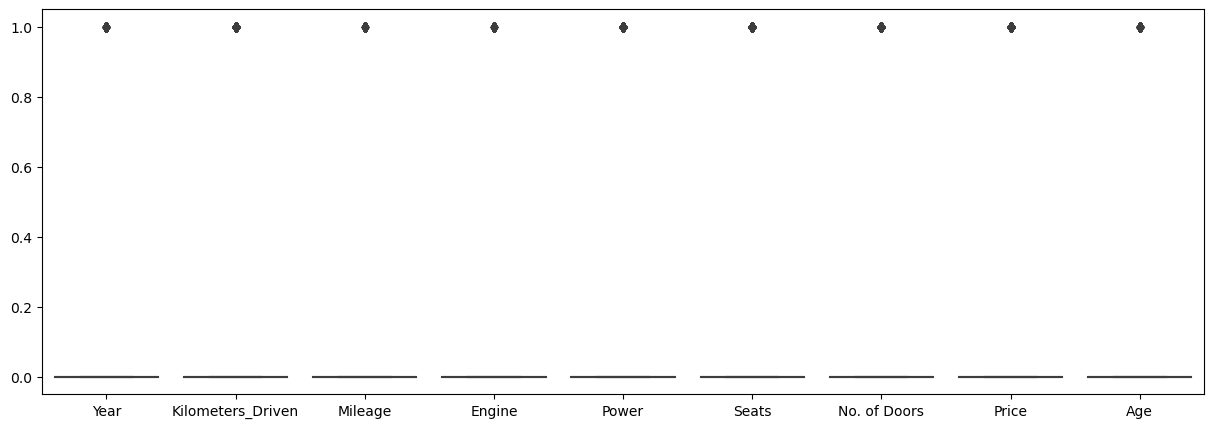

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=outliers)

**ENCODING**

In [29]:
df['Owner_Type'].unique()

array(['Third', 'First', 'Second', 'Fourth & Above'], dtype=object)

In [30]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [31]:
le_owner = preprocessing.LabelEncoder()
le_owner.fit(['First', 'Second', 'Third', 'Fourth & Above'])
df['Owner_Type'] = le_owner.transform(df['Owner_Type'])

le_transmission = preprocessing.LabelEncoder()
le_transmission.fit(['Manual', 'Automatic'])
df['Transmission'] = le_transmission.transform(df['Transmission'])

df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8816\614594080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Owner_Type'] = le_owner.transform(df['Owner_Type'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8816\614594080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transmission'] = le_transmission.transform(df['Transmission'])


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age,Year Quarter
0,Mahindra Scorpio,Pune,2012,99000.0,Diesel,1,3,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.00,12,Quarter 2
1,Maruti Baleno,Kochi,2018,18678.0,Petrol,1,0,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32,6,Quarter 3
2,Mahindra Xylo,Bangalore,2013,197000.0,Diesel,1,0,11.68,2498.0,112.0,White,7.0,5.0,NaN,4.00,11,Quarter 3
3,Hyundai Grand,Delhi,2014,45000.0,Diesel,1,0,24.00,1120.0,70.0,White,5.0,4.0,NaN,3.49,10,Quarter 3
4,Toyota Innova,Delhi,2011,65000.0,Diesel,1,0,12.80,2494.0,102.0,Others,8.0,5.0,NaN,6.40,13,Quarter 2


**GROUPING**

In [32]:
# Group by Fuel_Type and calculate the mean price for each group
fuel_type_groups = df.groupby('Fuel_Type')['Price'].mean()
fuel_type_groups

Fuel_Type
CNG        3.548909
Diesel    12.898802
LPG        2.502222
Petrol     5.732487
Name: Price, dtype: float64

# DATA VISUALIZATION

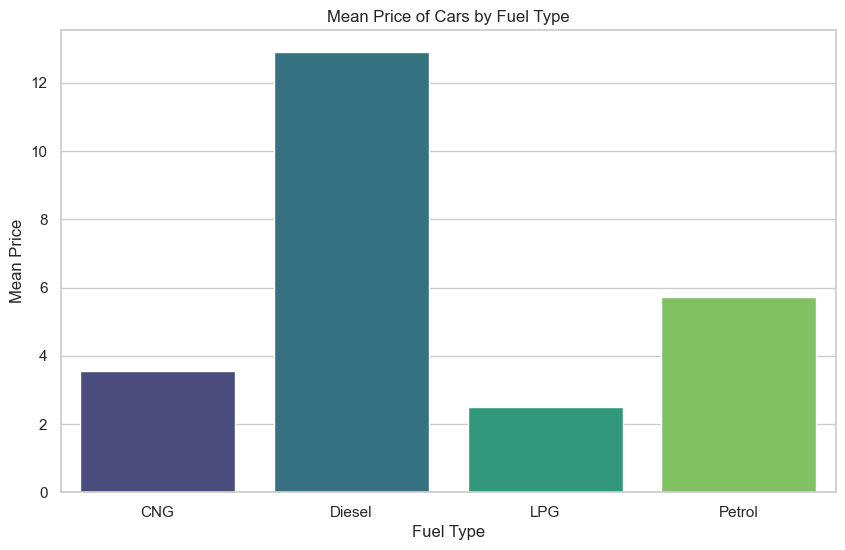

In [33]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_type_groups.index, y=fuel_type_groups.values, palette="viridis")
plt.title('Mean Price of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Price')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8816\3668783102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


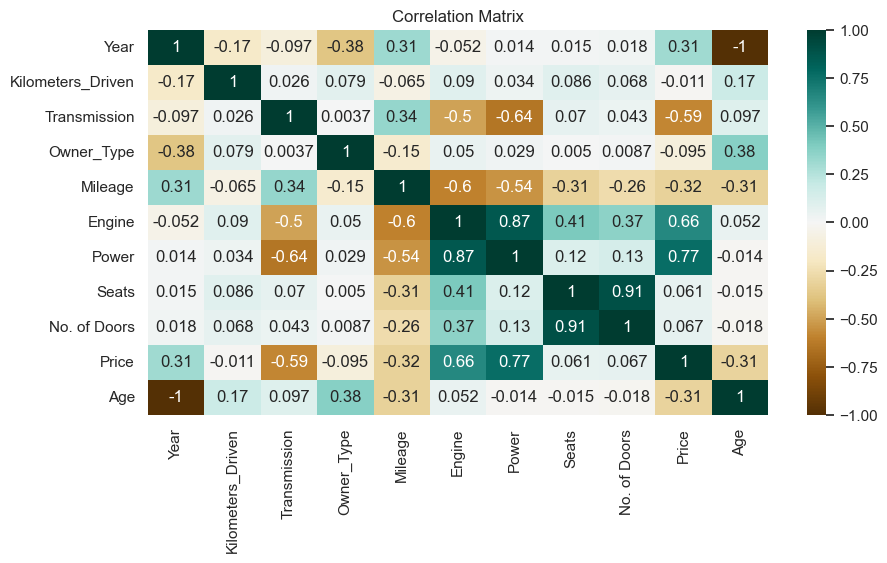

In [34]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG')
plt.title('Correlation Matrix')
plt.show()

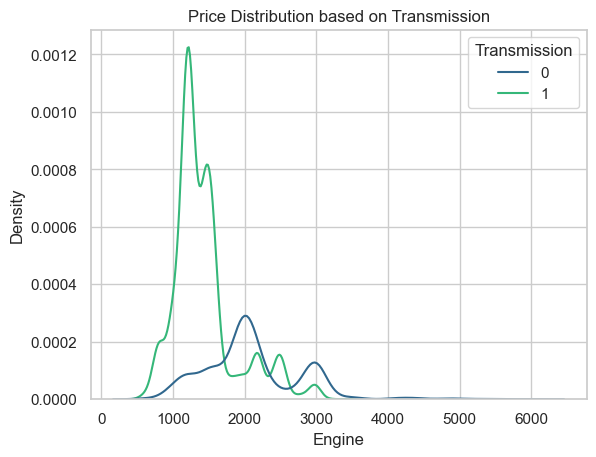

In [35]:
sns.kdeplot(x='Engine', hue='Transmission', data=df, palette='viridis')
plt.title('Price Distribution based on Transmission')
plt.show()

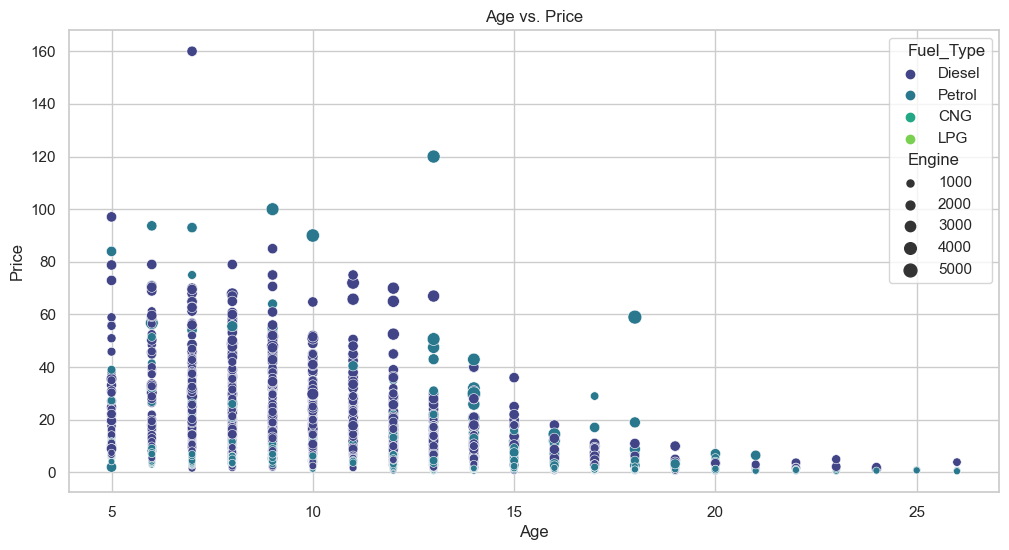

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Price', data=df, hue='Fuel_Type', palette='viridis', size='Engine', sizes=(20, 100))
plt.title('Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

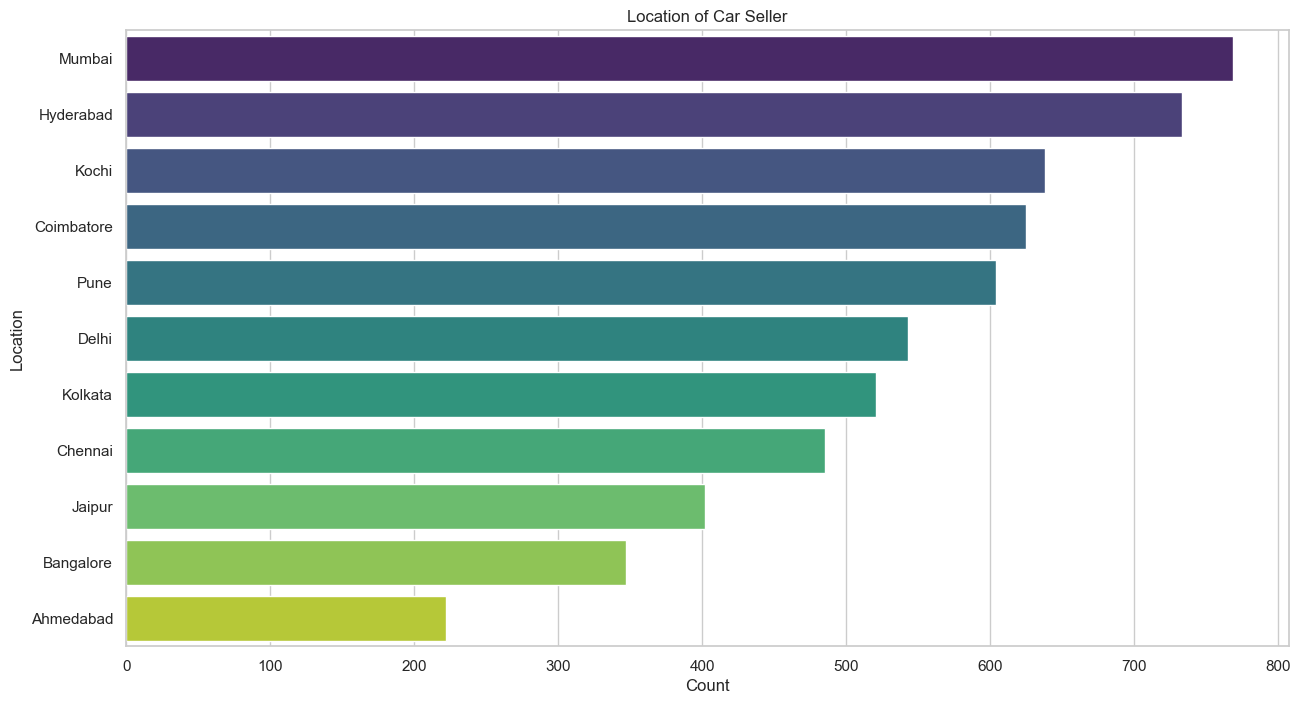

In [37]:
plt.figure(figsize=(15, 8))
sns.countplot(y='Location', data=df, palette='viridis', order=df['Location'].value_counts().index)
plt.title('Location of Car Seller')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

# MODELLING

In [41]:
# Handle any remaining missing values
df = df.dropna(subset=['Power'])

In [42]:
regresi = df[['Age','Kilometers_Driven','Mileage','Engine','Power','Price']]
regresi

,Age,Kilometers_Driven,Mileage,Engine,Power,Price
0,11,99000.0,12.05,2179.0,120.0,6.00
1,5,18678.0,21.10,998.0,100.0,8.32
2,10,197000.0,11.68,2498.0,112.0,4.00
3,9,45000.0,24.00,1120.0,70.0,3.49
4,12,65000.0,12.80,2494.0,102.0,6.40
...,...,...,...,...,...,...
5956,12,47000.0,13.90,1799.0,130.3,4.50
5957,10,63777.0,18.50,1197.0,82.9,3.67
5958,7,37806.0,20.40,1197.0,81.8,5.20
5959,7,22732.0,18.10,3498.0,306.0,55.54


In [44]:
msk = np.random.rand(len(df)) < 0.8
train = regresi[msk]
test = regresi[~msk]

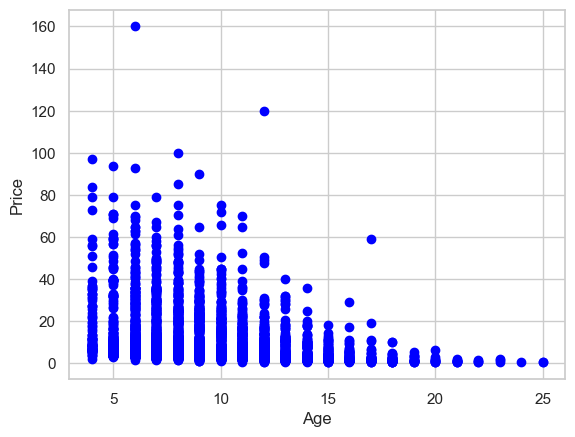

In [45]:
plt.scatter(train.Age, train.Price, color='blue')
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

In [46]:
simple_regression_model = LinearRegression()
simple_regression_model.fit(train[['Age']], train['Price'])

LinearRegression()

In [47]:
multiple_regression_model = LinearRegression()
x_multiple = train[['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']]
multiple_regression_model.fit(x_multiple, train['Price'])

LinearRegression()

In [48]:
poly_features = PolynomialFeatures(degree=2)
x_poly = train[['Age']]
x_poly = poly_features.fit_transform(x_poly)
polynomial_regression_model = LinearRegression()
polynomial_regression_model.fit(x_poly, train['Price'])

LinearRegression()

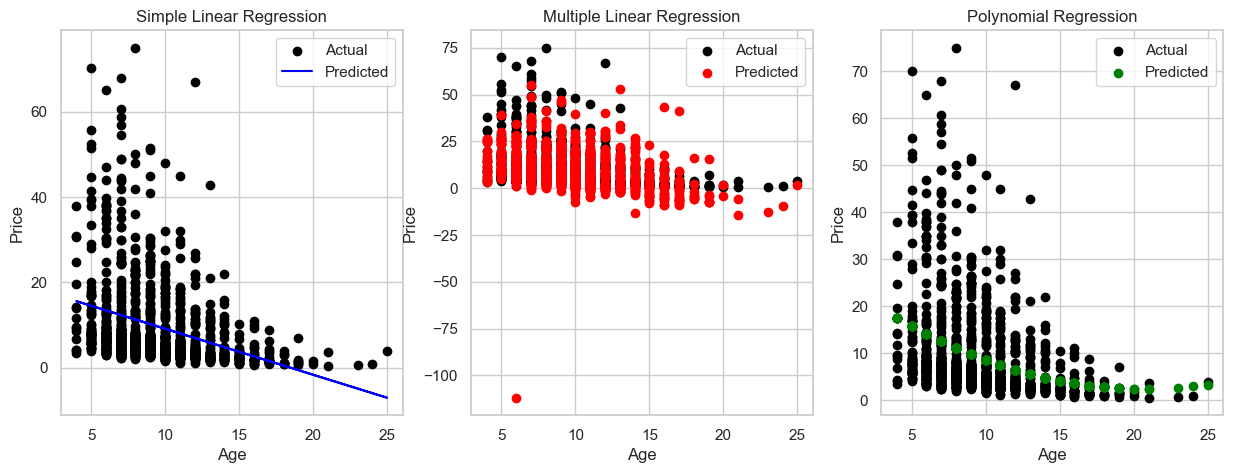

In [49]:
# Plot outputs
plt.figure(figsize=(15, 5))

# Simple Linear Regression Plot
plt.subplot(1, 3, 1)
plt.scatter(test['Age'], test['Price'], color='black', label='Actual')
plt.plot(test[['Age']], simple_regression_model.predict(test[['Age']]), color='blue', label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()

# Multiple Linear Regression Plot
plt.subplot(1, 3, 2)
plt.scatter(test['Age'], test['Price'], color='black', label='Actual')
plt.scatter(test['Age'], multiple_regression_model.predict(test[['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']])
            , color='red', label='Predicted')
plt.title('Multiple Linear Regression')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()

# Polynomial Regression Plot
plt.subplot(1, 3, 3)
plt.scatter(test['Age'], test['Price'], color='black', label='Actual')
x_test_poly = poly_features.transform(test[['Age']])
plt.scatter(test['Age'], polynomial_regression_model.predict(x_test_poly), color='green', label='Predicted')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()


In [50]:
# Evaluation
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

# Evaluate Simple Linear Regression
mse_simple, r2_simple = evaluate_model(simple_regression_model, test[['Age']], test['Price'])
print("Simple Linear Regression - MSE: {:.2f}, R2-score: {:.2f}".format(mse_simple, r2_simple))

# Evaluate Multiple Linear Regression
x_test_multiple = test[['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']]
mse_multiple, r2_multiple = evaluate_model(multiple_regression_model, x_test_multiple, test['Price'])
print("Multiple Linear Regression - MSE: {:.2f}, R2-score: {:.2f}".format(mse_multiple, r2_multiple))

# Evaluate Polynomial Regression
x_test_poly = poly_features.transform(test[['Age']])
mse_poly, r2_poly = evaluate_model(polynomial_regression_model, x_test_poly, test['Price'])
print("Polynomial Regression - MSE: {:.2f}, R2-score: {:.2f}".format(mse_poly, r2_poly))

Simple Linear Regression - MSE: 95.80, R2-score: 0.10
Multiple Linear Regression - MSE: 58.15, R2-score: 0.46
Polynomial Regression - MSE: 95.34, R2-score: 0.11


### Simple Linear Regression

In [51]:
df_cut = df[['Age','Kilometers_Driven','Mileage','Engine','Power','Price']]
df_cut

,Age,Kilometers_Driven,Mileage,Engine,Power,Price
0,11,99000.0,12.05,2179.0,120.0,6.00
1,5,18678.0,21.10,998.0,100.0,8.32
2,10,197000.0,11.68,2498.0,112.0,4.00
3,9,45000.0,24.00,1120.0,70.0,3.49
4,12,65000.0,12.80,2494.0,102.0,6.40
...,...,...,...,...,...,...
5956,12,47000.0,13.90,1799.0,130.3,4.50
5957,10,63777.0,18.50,1197.0,82.9,3.67
5958,7,37806.0,20.40,1197.0,81.8,5.20
5959,7,22732.0,18.10,3498.0,306.0,55.54


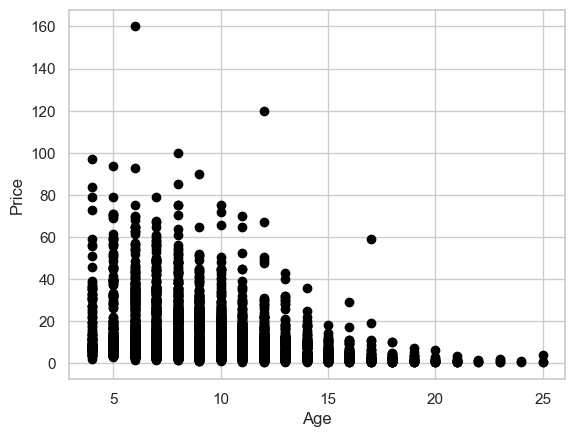

In [52]:
plt.scatter(df_cut.Age, df_cut.Price, color='black')
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

In [53]:
msk = np.random.rand(len(df)) < 0.8
train = df_cut[msk]
test = df_cut[~msk]

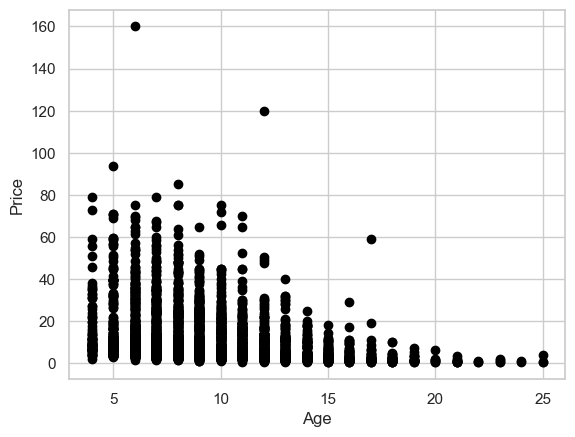

In [54]:
plt.scatter(train.Age, train.Price, color='black')
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

In [55]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Age']])
train_y = np.asanyarray(train[['Price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[-1.02059869]]
Intercept:  [19.2773693]


Text(0, 0.5, 'Price')

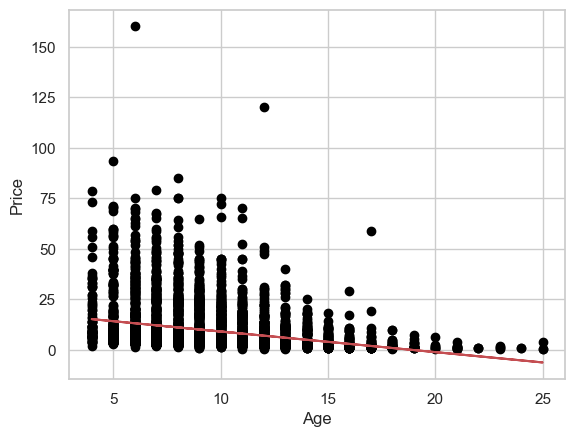

In [56]:
plt.scatter(train.Age, train.Price, color='black')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Age")
plt.ylabel("Price")

In [57]:
test_x = np.asanyarray(test[['Age']]) 
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of square (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 7.18
Residual sum of square (MSE): 137.53
R2-score: 0.10


### Multiple Regression

In [58]:
multi = df[['Age','Kilometers_Driven','Mileage','Engine','Power','Price']]
multi

,Age,Kilometers_Driven,Mileage,Engine,Power,Price
0,11,99000.0,12.05,2179.0,120.0,6.00
1,5,18678.0,21.10,998.0,100.0,8.32
2,10,197000.0,11.68,2498.0,112.0,4.00
3,9,45000.0,24.00,1120.0,70.0,3.49
4,12,65000.0,12.80,2494.0,102.0,6.40
...,...,...,...,...,...,...
5956,12,47000.0,13.90,1799.0,130.3,4.50
5957,10,63777.0,18.50,1197.0,82.9,3.67
5958,7,37806.0,20.40,1197.0,81.8,5.20
5959,7,22732.0,18.10,3498.0,306.0,55.54


In [59]:
msk = np.random.rand(len(df)) < 0.8
train = multi[msk]
test = multi[~msk]

In [60]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']])
y = np.asanyarray(train[['Price']])
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-9.47178797e-01 -1.92148768e-05  1.31410833e-02  1.94452549e-03
   1.42677217e-01]]


In [61]:
y_hat = regr.predict(test[['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']])
x = np.asanyarray(test[['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
    % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 58.92
Variance score: 0.58


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Polynomial Regression

In [62]:
polym = df[['Age','Kilometers_Driven','Mileage','Engine','Power','Price']]
polym

,Age,Kilometers_Driven,Mileage,Engine,Power,Price
0,11,99000.0,12.05,2179.0,120.0,6.00
1,5,18678.0,21.10,998.0,100.0,8.32
2,10,197000.0,11.68,2498.0,112.0,4.00
3,9,45000.0,24.00,1120.0,70.0,3.49
4,12,65000.0,12.80,2494.0,102.0,6.40
...,...,...,...,...,...,...
5956,12,47000.0,13.90,1799.0,130.3,4.50
5957,10,63777.0,18.50,1197.0,82.9,3.67
5958,7,37806.0,20.40,1197.0,81.8,5.20
5959,7,22732.0,18.10,3498.0,306.0,55.54


In [63]:
msk = np.random.rand(len(df)) < 0.8
train = polym[msk]
test = polym[~msk]

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Age']]) 
train_y = np.asanyarray(train[['Price']]) 

test_x = np.asanyarray(test[['Age']]) 
test_y = np.asanyarray(test[['Price']]) 


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.,  10., 100.],
       [  1.,   9.,  81.],
       [  1.,  12., 144.],
       ...,
       [  1.,   7.,  49.],
       [  1.,   7.,  49.],
       [  1.,   7.,  49.]])

In [65]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The Coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         -2.26545202  0.0550413 ]]
Intercept:  [25.53176851]


Text(0, 0.5, 'Price')

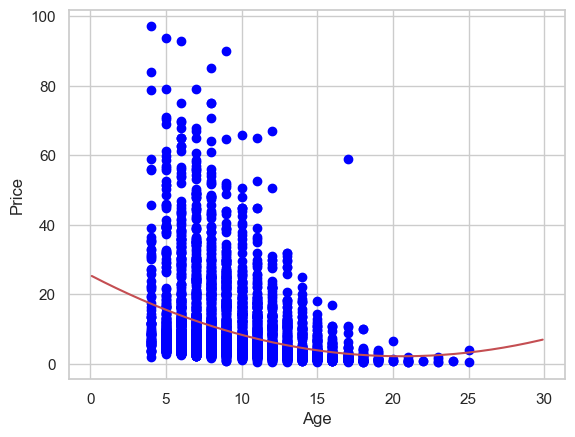

In [66]:
plt.scatter(train.Age, train.Price, color='blue')
XX = np.arange(0.1, 30.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel("Age")
plt.ylabel("Price")

In [67]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_) )

Mean absolute error: 7.13
Residual sum of squares (MSE): 142.61
R2-score: 0.07


## <div align="center"> FINAL PROJECT - INDIVIDU </div>

**VISUALISASI**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

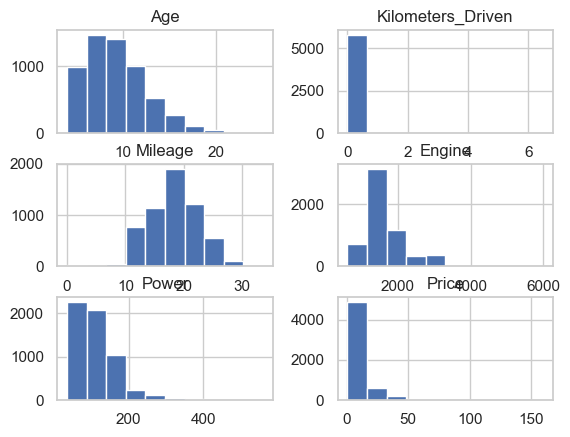

In [43]:
regresi.hist()

**HANDLING OUTLIERS**

In [82]:
df_outlier = df[['Age']]
df_outlier

,Age
0,11
1,5
2,10
3,9
4,12
...,...
5956,12
5957,10
5958,7
5959,7


<Axes: >

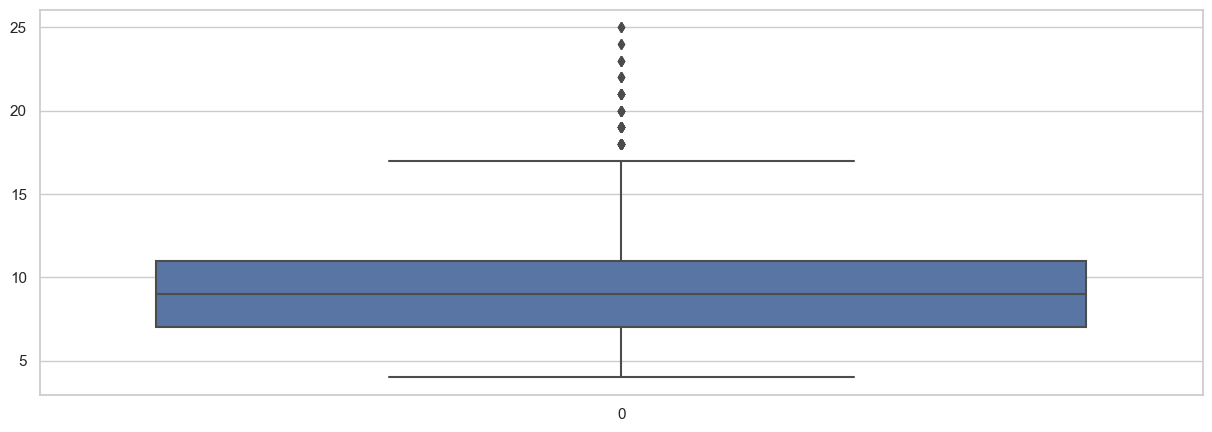

In [185]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df['Age'])

In [91]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

Q1, Q3

(7.0, 11.0)

In [92]:
IQR = Q3 - Q1
IQR

4.0

In [93]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(1.0, 17.0)

In [95]:
df[(df['Age'] > lower_limit) & (df['Age'] < upper_limit) ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age,Year Quarter
0,Mahindra Scorpio,Pune,2012,99000.0,Diesel,1,3,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.00,11,Quarter 2
1,Maruti Baleno,Kochi,2018,18678.0,Petrol,1,0,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32,5,Quarter 3
2,Mahindra Xylo,Bangalore,2013,197000.0,Diesel,1,0,11.68,2498.0,112.0,White,7.0,5.0,NaN,4.00,10,Quarter 3
3,Hyundai Grand,Delhi,2014,45000.0,Diesel,1,0,24.00,1120.0,70.0,White,5.0,4.0,NaN,3.49,9,Quarter 3
4,Toyota Innova,Delhi,2011,65000.0,Diesel,1,0,12.80,2494.0,102.0,Others,8.0,5.0,NaN,6.40,12,Quarter 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,Honda Civic,Pune,2011,47000.0,Petrol,0,2,13.90,1799.0,130.3,Others,5.0,4.0,NaN,4.50,12,Quarter 2
5957,Hyundai i20,Delhi,2013,63777.0,Petrol,1,0,18.50,1197.0,82.9,Black/Silver,5.0,4.0,NaN,3.67,10,Quarter 3
5958,Maruti Swift,Coimbatore,2016,37806.0,Petrol,1,0,20.40,1197.0,81.8,Black/Silver,5.0,4.0,NaN,5.20,7,Quarter 3
5959,Mercedes-Benz SLK-Class,Coimbatore,2016,22732.0,Petrol,0,0,18.10,3498.0,306.0,Black/Silver,2.0,2.0,NaN,55.54,7,Quarter 3


In [96]:
# Menyimpan data no outlier ke var baru
no_outlier = df[(df['Age'] > lower_limit) & (df['Age'] < upper_limit)]
no_outlier

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age,Year Quarter
0,Mahindra Scorpio,Pune,2012,99000.0,Diesel,1,3,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.00,11,Quarter 2
1,Maruti Baleno,Kochi,2018,18678.0,Petrol,1,0,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32,5,Quarter 3
2,Mahindra Xylo,Bangalore,2013,197000.0,Diesel,1,0,11.68,2498.0,112.0,White,7.0,5.0,NaN,4.00,10,Quarter 3
3,Hyundai Grand,Delhi,2014,45000.0,Diesel,1,0,24.00,1120.0,70.0,White,5.0,4.0,NaN,3.49,9,Quarter 3
4,Toyota Innova,Delhi,2011,65000.0,Diesel,1,0,12.80,2494.0,102.0,Others,8.0,5.0,NaN,6.40,12,Quarter 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,Honda Civic,Pune,2011,47000.0,Petrol,0,2,13.90,1799.0,130.3,Others,5.0,4.0,NaN,4.50,12,Quarter 2
5957,Hyundai i20,Delhi,2013,63777.0,Petrol,1,0,18.50,1197.0,82.9,Black/Silver,5.0,4.0,NaN,3.67,10,Quarter 3
5958,Maruti Swift,Coimbatore,2016,37806.0,Petrol,1,0,20.40,1197.0,81.8,Black/Silver,5.0,4.0,NaN,5.20,7,Quarter 3
5959,Mercedes-Benz SLK-Class,Coimbatore,2016,22732.0,Petrol,0,0,18.10,3498.0,306.0,Black/Silver,2.0,2.0,NaN,55.54,7,Quarter 3


In [97]:
Q1 = no_outlier['Age'].quantile(0.25)
Q3 = no_outlier['Age'].quantile(0.75)

Q1, Q3

(7.0, 11.0)

In [98]:
IQR = Q3 - Q1
IQR

4.0

In [99]:
lowwer_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lowwer_limit,upper_limit

(1.0, 17.0)

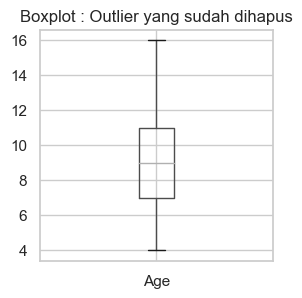

In [184]:
plt.figure(figsize=(3,3))
no_outlier.boxplot(column=['Age'])
plt.title('Boxplot : Outlier yang sudah dihapus')
plt.show()

**MODELING & EVALUATION**

In [186]:
df_cut1 = df[['Age','Engine','Power','Price']]
df_cut1

,Age,Engine,Power,Price
0,11,2179.0,120.0,6.00
1,5,998.0,100.0,8.32
2,10,2498.0,112.0,4.00
3,9,1120.0,70.0,3.49
4,12,2494.0,102.0,6.40
...,...,...,...,...
5956,12,1799.0,130.3,4.50
5957,10,1197.0,82.9,3.67
5958,7,1197.0,81.8,5.20
5959,7,3498.0,306.0,55.54


In [187]:
msk = np.random.rand(len(df)) < 0.8
train = df_cut1[msk]
test = df_cut1[~msk]

In [188]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Age','Engine', 'Power']])
y = np.asanyarray(train[['Price']])
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-1.04386736e+00  9.78555098e-04  1.49613647e-01]]


In [189]:
y_hat = regr.predict(test[['Age','Engine', 'Power']])
x = np.asanyarray(test[['Age', 'Engine', 'Power']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
    % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 34.39
Variance score: 0.72


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
